In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit import execute, Aer
from matplotlib.pyplot import*
import numpy as np
import matplotlib.pyplot as plt
import qiskit.quantum_info as qi

In [2]:
# we define the range for the phase difference, such it can take all of the following values:
n = 50
s = [i * 2 * np.pi / n for i in range(n)]
#s

For $U_+ = CR_y(\theta)$

$\textbf{Sz}$

In [3]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0 = []
p1 = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

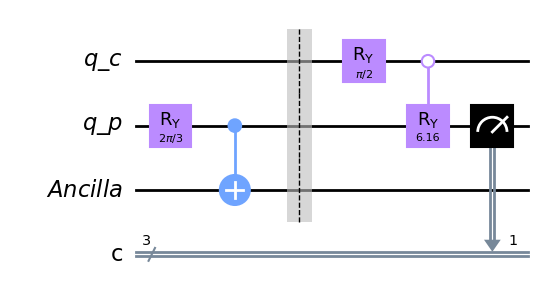

In [4]:
q1.draw('mpl')

In [5]:
sz = []

for i in range(50):
    sz.append(p0[i]-p1[i])

$\textbf{Sx}$

In [6]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0x = []
p1x = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.h(q_p[0]) # rotation to x basis
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0x.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1x.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

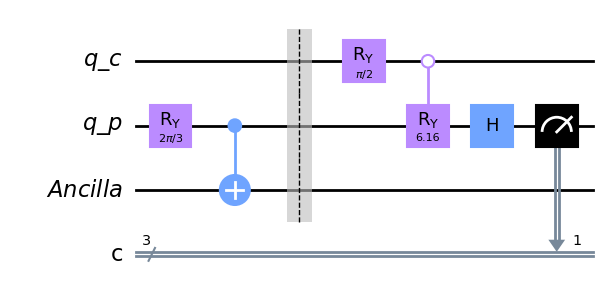

In [7]:
q1.draw('mpl')

In [8]:
sx = []

for i in range(50):
    sx.append(p0x[i]-p1x[i]) 

$\textbf{Sy}$

In [9]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0y = []
p1y = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.sdg(q_p[0]) #phase gate
    q1.h(q_p[0]) # rotation to y basis
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0y.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1y.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

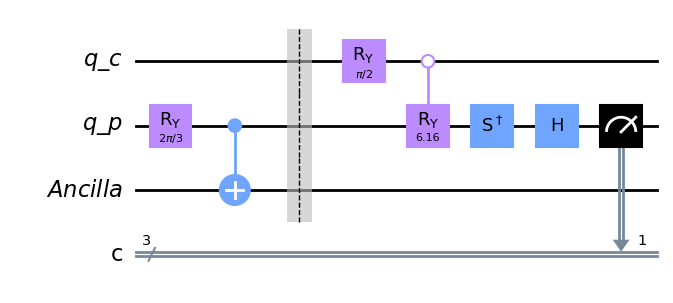

In [10]:
q1.draw('mpl')

In [11]:
sy = []

for i in range(50):
    sy.append(p0y[i]-p1y[i])  

In [12]:
x = np.array([[0,1],
     [1,0]])
y = np.array([[0,-complex(0,1)],
     [complex(0,1),0]])
z = np.array([[1,0],
     [0,-1]])
I = np.array([[1,0],
    [0,1]])

In [13]:
rho_p = []

for i in range(50):
    s1 = np.add(I,sx[i]*x)
    s2 = np.add(sy[i]*y,sz[i]*z)
    s3 = np.add(s1,s2)
    rho_p.append(0.5*s3)

For $U_- = I$

$\textbf{Sz}$

In [14]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0 = []
p1 = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

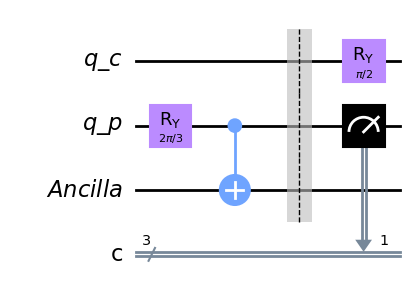

In [15]:
q1.draw('mpl')

In [16]:
sz = []

for i in range(50):
    sz.append(p0[i]-p1[i])  

$\textbf{Sx}$

In [17]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0x = []
p1x = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.h(q_p[0]) # rotation to x basis
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0x.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1x.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

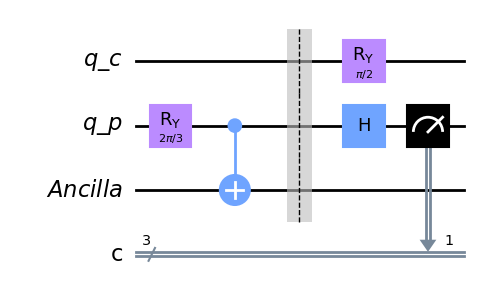

In [18]:
q1.draw('mpl')

In [19]:
sx = []

for i in range(50):
    sx.append(p0x[i]-p1x[i])  

$\textbf{Sy}$

In [20]:
# we can make plots for different values of theta and fixed values of phi:
qasm_simulator = Aer.get_backend('qasm_simulator')
#we define empty lists to use them later to store the statistics of measuring values 00, 01, 10, 11 for different values of theta and phi
p0y = []
p1y = []


phi_1 = np.pi
theta1 = np.pi/4

q_c = QuantumRegister(1,'q_{c}')
q_p = QuantumRegister(1,'q_{p}')
q_a = QuantumRegister(1,'Ancilla')
cr = ClassicalRegister(3,'c')

for theta in s:
    q1 = QuantumCircuit(q_c,q_p,q_a,cr)
    q1.ry(2*np.pi/3,q_p[0]) # mixed state \rho = 1/4|h><h|+3/4|v><v|
    q1.cx(1,q_a[0])
    q1.barrier()
    
    q1.ry(2*theta1,q_c[0]) # symmetric beam-splitter
    #q1.cry(theta,q_c[0],q_p[0],ctrl_state = 0) # U operator for polarization
    q1.sdg(q_p[0]) #phase gate
    q1.h(q_p[0]) # rotation to y basis
    
    #q1.measure(q_c[0],cr[0])
    q1.measure(q_p[0],cr[1])
    job = execute([q1 for i in range(50)],qasm_simulator,shots = 1000) #implement the simulation
    counts = job.result().get_counts()

    temp1 = [] #will store how many 00 values we have for each value of theta
    temp2 = [] #will store how many 01 values we have for each value of theta

    for i in range(50):
        temp1.append(counts[i].get('000',0)/1000) #stores how many (relative population) 00 values we have (50 times) for each value of theta 
        temp2.append(counts[i].get('010',1)/1000) #stores how many (relative population) 01 values we have (50 times) for each value of theta
        
    p0y.append(sum(temp1)/50) # takes the prob of 00 to occur for all the values of theta
    p1y.append(sum(temp2)/50) # takes the prob of 01 to occur for all the values of theta
    #sx.append(sum(temp1)/50-sum(temp2)/50)

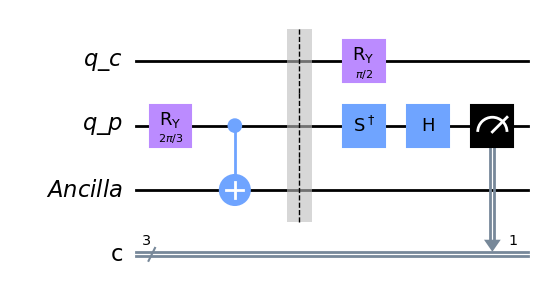

In [21]:
q1.draw('mpl')

In [22]:
sy = []

for i in range(50):
    sy.append(p0y[i]-p1y[i])  

In [23]:
rho_m = []

for i in range(50):
    s1 = np.add(I,sx[i]*x)
    s2 = np.add(sy[i]*y,sz[i]*z)
    s3 = np.add(s1,s2)
    rho_m.append(0.5*s3)

In [24]:
d = []
for i in range(50):
    d.append(((np.abs(rho_p[i] - rho_m[i])).trace()))

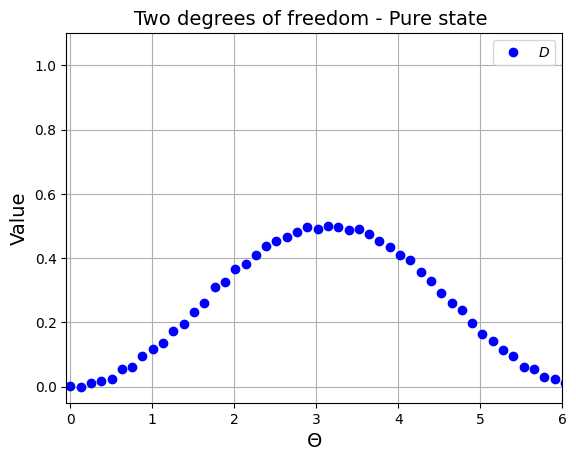

<Figure size 640x480 with 0 Axes>

In [25]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,d,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()

In [26]:
rho_md = []
for i in range(50):
    eigenvalues, eigenvectors = np.linalg.eig(rho_m[i])
    p_inv = np.linalg.inv(eigenvectors)
    rho_md.append(np.dot(p_inv,np.dot(rho_m[i],eigenvectors)))

In [40]:
rho_m[49]

array([[0.25108+0.j     , 0.00094+0.00074j],
       [0.00094-0.00074j, 0.74892+0.j     ]])

In [39]:
rho_md[19]

array([[2.49925434e-01-8.47032947e-22j, 2.06372651e-19+8.67361738e-19j],
       [1.32685511e-19-2.16840434e-19j, 7.50074566e-01-1.69406589e-21j]])

In [32]:
rho_pd = []
for i in range(50):
    eigenvalues, eigenvectors = np.linalg.eig(rho_p[i])
    p_inv = np.linalg.inv(eigenvectors)
    rho_pd.append(np.dot(p_inv,np.dot(rho_p[i],eigenvectors)))

In [33]:
d1 = []
for i in range(50):
    d1.append(((np.abs(rho_pd[i] - rho_md[i])).trace()))

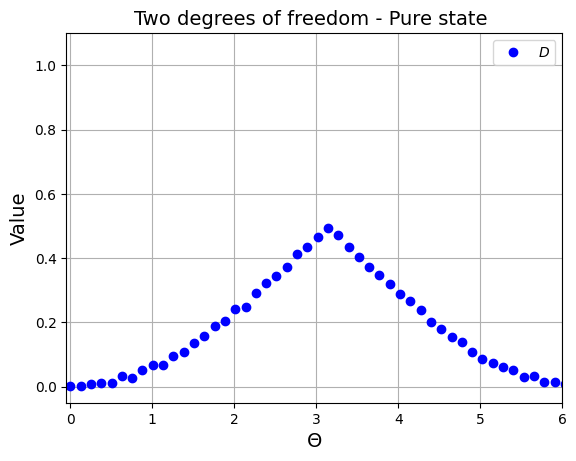

<Figure size 640x480 with 0 Axes>

In [37]:
# We can also visualize all the probabilities for all possible values of phi by plotting the probs p0 and p1
fig, ax = plt.subplots()

errorbar(s,d1,fmt='b.',capsize=5,label=r"$D$",markersize=12)

ax.set_title('Two degrees of freedom - Pure state ', size=14)
#xlabel(r"$\phi$",fontsize=20);
#ylabel(r"$P$",fontsize=20);
xticks(fontsize=10); #s,rotation='horizontal',
yticks(fontsize=10);
legend(fontsize=10);
plt.xlabel("$\Theta$",size=14)
plt.ylabel("Value",size=14)
ax.set_xlim(-0.05, 6)
ax.set_ylim(-0.05, 1.1)
grid("on")
plt.legend()

fig1 = plt.gcf()
plt.show()
plt.draw()